In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

data = pd.read_excel('international-airline-passengers.xlsx')
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


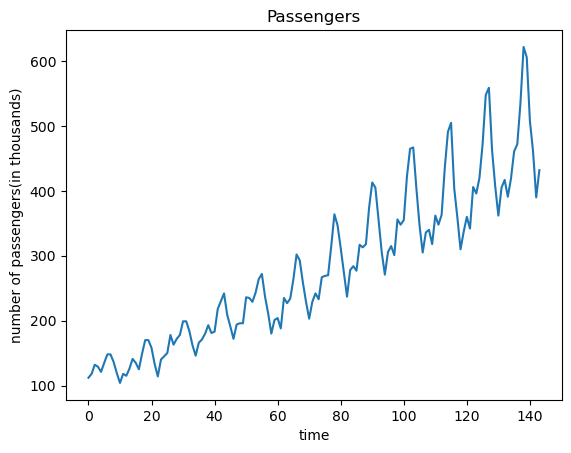

In [4]:
df=data.iloc[:,1].values
plt.plot(df)
plt.xlabel('time')
plt.ylabel('number of passengers(in thousands)')
plt.title('Passengers')
plt.show()

In [5]:
df.shape


(146,)

In [6]:
df=df.reshape(-1,1)
df=df.astype('float32')
df.shape

(146, 1)

In [7]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)

In [8]:
train_size=int(len(df)*0.5)
test_size=len(df)-train_size
print('Train Size:\t',train_size)
print()
print('Test Size:\t',test_size)


Train Size:	 73

Test Size:	 73


In [9]:
train=df[0:train_size,:]
test=df[train_size:len(df),:]
print('Train Size:\t',len(train))
print()
print('Test Size:\t',len(test))

Train Size:	 73

Test Size:	 73


In [10]:
datax=[]
datay=[]
timestamp=10
for i in range(len(train)-timestamp-1):
 a=train[i:(i+timestamp),0]
 datax.append(a)
 datay.append(train[i+timestamp,0])
 
trainx,trainy=np.array(datax),np.array(datay)
print(trainx.shape,trainy.shape)

(62, 10) (62,)


In [11]:
trainx


array([[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
        0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
        0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ],
       [0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207,
        0.08494207, 0.06177607, 0.02895753, 0.        , 0.02702703],
       [0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207,
        0.06177607, 0.02895753, 0.        , 0.02702703, 0.02123553],
       [0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607,
        0.02895753, 0.        , 0.02702703, 0.02123553, 0.04247104],
       [0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753,
        0.        , 0.02702703, 0.02123553, 0.04247104, 0.07142857],
       [0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
        0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557],
       [0.08494207, 0.06177607, 0.0289575

In [12]:
datax=[]
datay=[]
timestamp=10
for i in range(len(test)-timestamp-1):
 a=test[i:(i+timestamp),0]
 datax.append(a)
 datay.append(test[i+timestamp,0])
 
testx,testy=np.array(datax),np.array(datay)
print(testx.shape,testy.shape)


(62, 10) (62,)


In [13]:
#reshape
trainx=np.reshape(trainx,(trainx.shape[0],1,trainx.shape[1]))
testx=np.reshape(testx,(testx.shape[0],1,testx.shape[1]))


In [14]:
trainx.shape


(62, 1, 10)

In [15]:
#LSTM Model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
#define the model
model=Sequential()
model.add(LSTM(10,input_shape=(1,timestamp)))
model.add(Dense(1))
#model compile
model.compile(optimizer='adam',loss='mean_squared_error')
#run the model
model.fit(trainx,trainy,epochs=50,batch_size=1)


Epoch 1/50
62/62 [==============================] - 2s 2ms/step - loss: 0.0104
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 8/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 9/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 11/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 12/50
62/62 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 13/50
62/62 [==============================

In [16]:
#make predictions
trainPredict=model.predict(trainx)
testPredict=model.predict(testx)
trainPredict[:5]


2/2 [==============================] - 0s 3ms/step


array([[0.04863919],
       [0.04032879],
       [0.05547219],
       [0.05063199],
       [0.05740412]], dtype=float32)

In [17]:
#Inverse the scalled form of data
trainPredict=scaler.inverse_transform(trainPredict)
trainPredict[:5]

array([[129.1951 ],
       [124.89031],
       [132.7346 ],
       [130.22736],
       [133.73534]], dtype=float32)

In [18]:
trainy=scaler.inverse_transform([trainy])
testPredict=scaler.inverse_transform(testPredict)
testy=scaler.inverse_transform([testy])

In [20]:
import numpy as np

# Check for NaN values in trainy and testy arrays
print("Trainy contains NaN:", np.isnan(trainy).any())
print("Testy contains NaN:", np.isnan(testy).any())

Trainy contains NaN: False
Testy contains NaN: True


In [21]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
trainy_imputed = imputer.fit_transform(trainy)
testy_imputed = imputer.transform(testy)

In [22]:
rainScore = np.sqrt(mean_squared_error(trainy_imputed[0], trainPredict[:, 0]))
print('Train Score-RMSE:\t', trainScore)

testScore = math.sqrt(mean_squared_error(testy_imputed[0], testPredict[:, 0]))
print('Test Score-RMSE:\t', testScore)

Train Score-RMSE:	 17.928915172999563
Test Score-RMSE:	 48.87510870012111


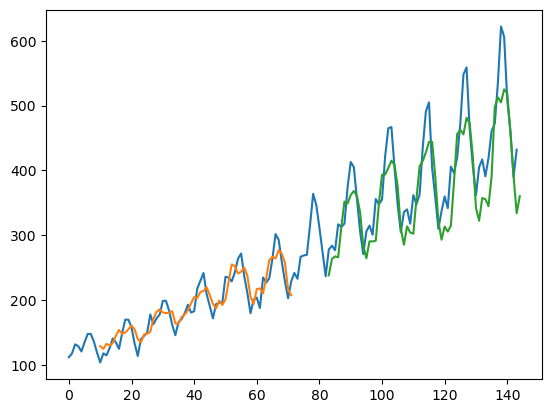

In [23]:
#Plotting

trainPredictPlot=np.empty_like(df)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[timestamp:len(trainPredict)+timestamp,:]=trainPredict
testPredictPlot=np.empty_like(df)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+(timestamp*2)+1:len(df)-1,:]=testPredict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()